## 📚 2.2 Análisis exploratorio de datos

En este punto ya tenemos nuestros datos “limpios”. En el notebook pasado, `1_clean.ipynb`, guardamos ambos conjuntos de datos. Ahora abre el notebook `2_EDA.ipynb` y comencemos.

> El análisis exploratorio de datos (EDA por sus siglas en inglés) es el proceso de examinar y visualizar datos para resumir sus principales características, frecuentemente utilizando técnicas estadísticas y gráficas, con el objetivo de comprender mejor las distribuciones, relaciones y posibles anomalías antes de aplicar modelos predictivos. Este paso es crucial para identificar patrones, detectar errores y sugerir hipótesis para el análisis posterior.

### Importar paquetes
Estamos en un nuevo notebook, entonces tenemos que volver a importar los paquetes que usaremos:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carga de datos
En el notebook anterior guardamos nuestros datos limpios en el directorio clean/ . Carguemos estos datos a DataFrames.

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

### Ánalisis
Comencemos con algunas cosas simples:

In [3]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
736,0,3,female,48.0,1,3,34.3750,S
596,1,2,female,28.0,0,0,33.0000,S
742,1,1,female,21.0,2,2,262.3750,C
192,1,3,female,19.0,1,0,7.8542,S


Analicemos nuestras variables una por una.

#### `Survived`

In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Esto signfica que en nuestro set de entrenamiento tenemos 549 pasajeros fallecidos y 342 que sobrevieron

Veamos estos mismos datos pero en una gráfica de barras:

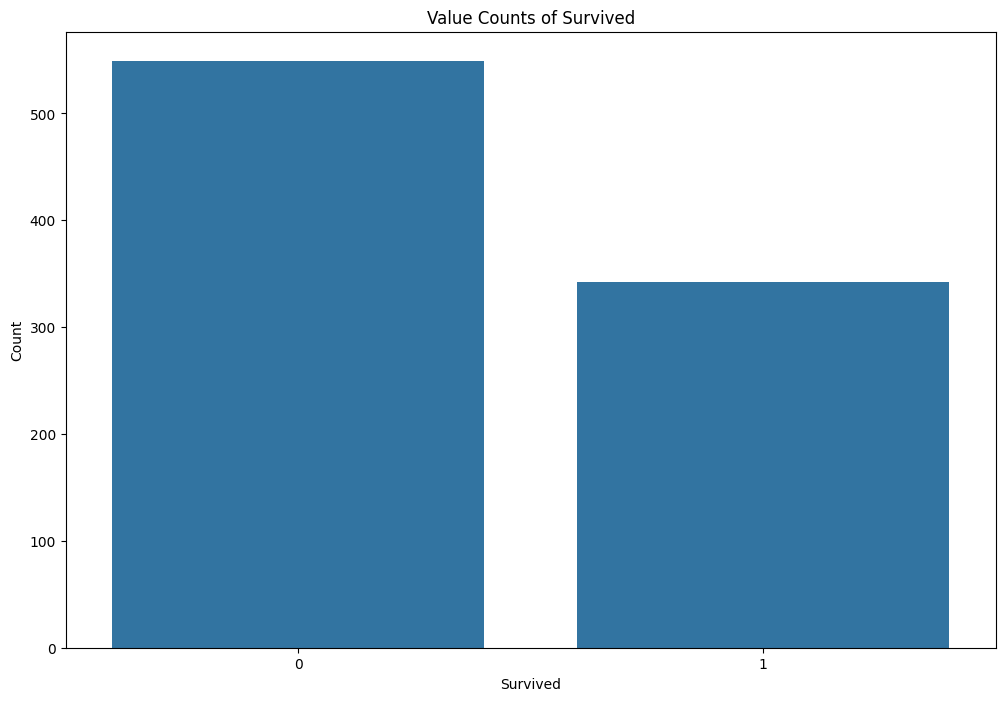

In [5]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

¿Cúal es la tasa de supervivencia?

In [6]:
survival_rate = (df['Survived'].sum() / len(df)) * 100
print(f"Tasa de supervivencia: {survival_rate:.2f}%")

Tasa de supervivencia: 38.38%


#### `Survived` y `Pclass`
Ahora analicemos la variable ``Survived` y la columna `PClass` al mismo tiempo. Queremos observar la cantidad de pasajeros que sobrevivieron en cada una de las 3 clases que había en el Titanic. 

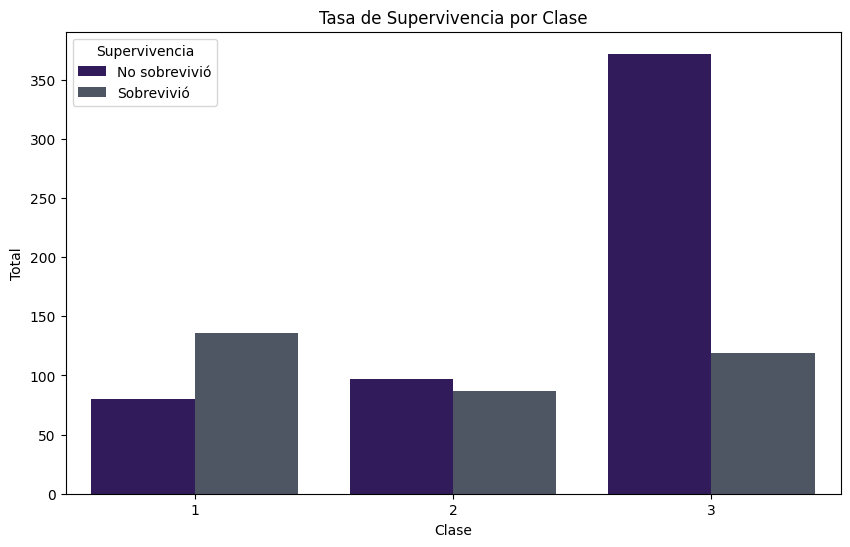

In [7]:
# Crear la gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['#2E1065', '#4A5568'])

plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Total')

# Personalizar la leyenda
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])

plt.show()

### `Survived` y `Sex`
Hagamos lo mismo pero ahora por sexo de la persona:

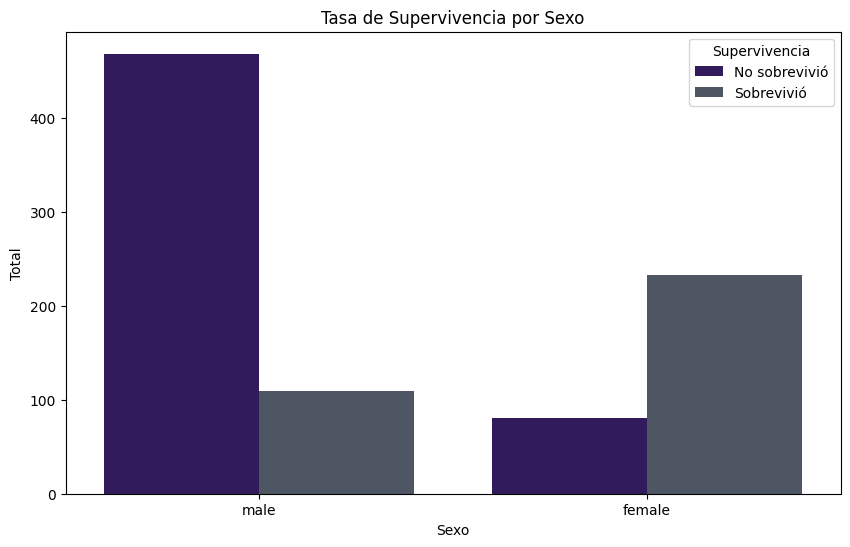

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#2E1065', '#4A5568'])

plt.title('Tasa de Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total')

plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])

plt.show()

### `Survived` y `Embarked`
Finalmente, veamos la tasa de supervivencia por puerto de embarque

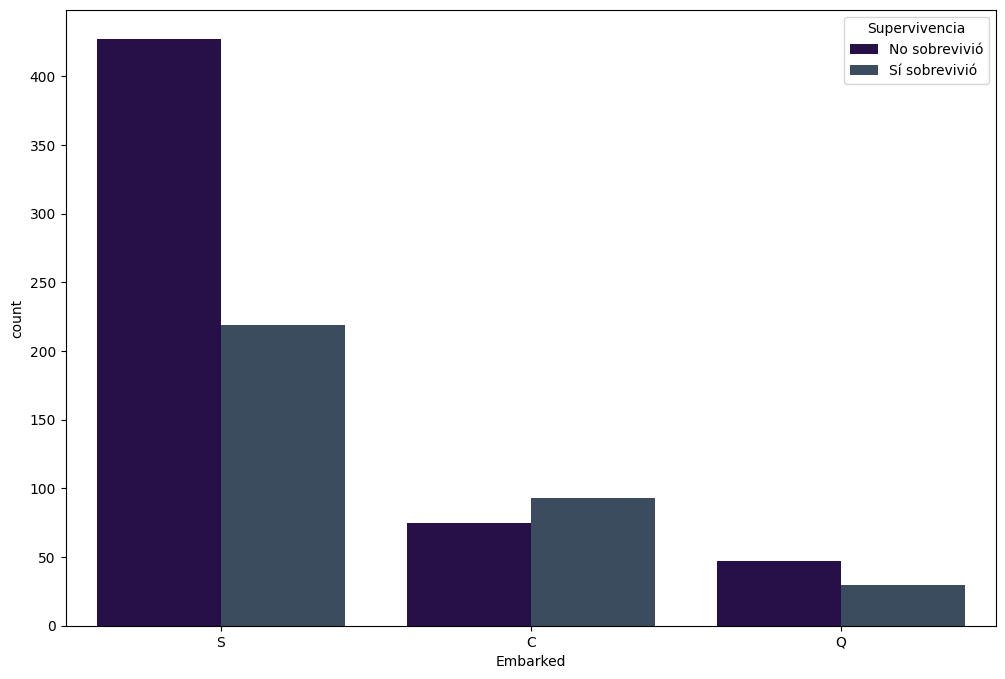

In [9]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

### Age
Veamos la distribución de las edades

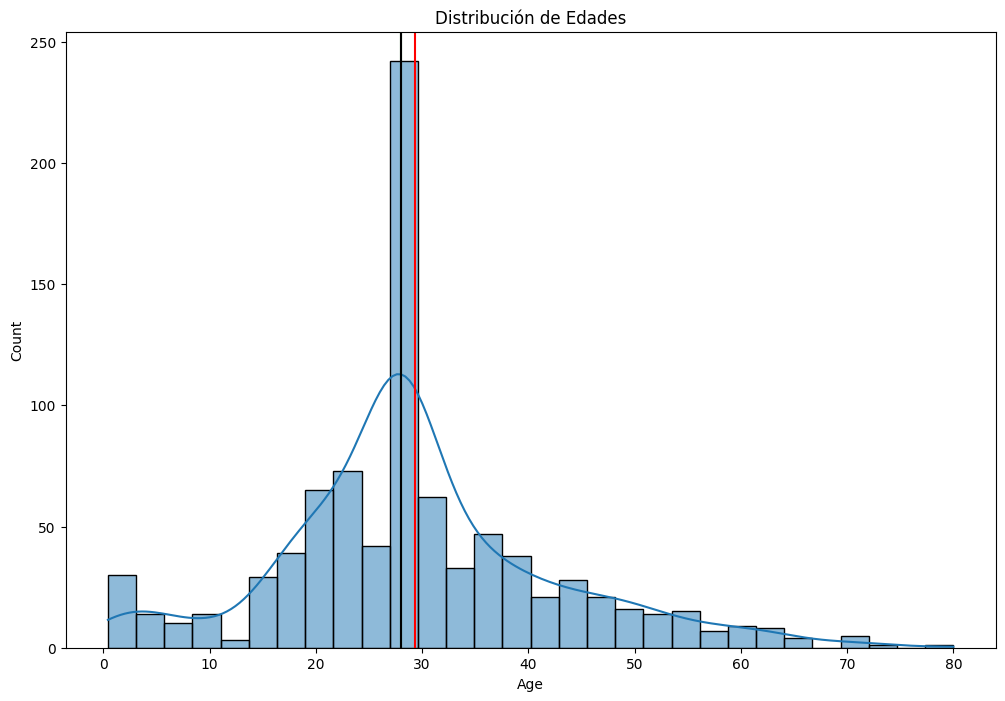

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [10]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

### Matríz de correlación
>Una matriz de correlación es una tabla que muestra cómo se relacionan entre sí diferentes variables. Cada celda de la tabla contiene un valor de correlación que indica la fuerza y dirección de la relación entre dos variables. Los valores van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta), mientras que 0 indica que no hay correlación.

> **Pide a ChatGPT que te explique línea por línea de este código**

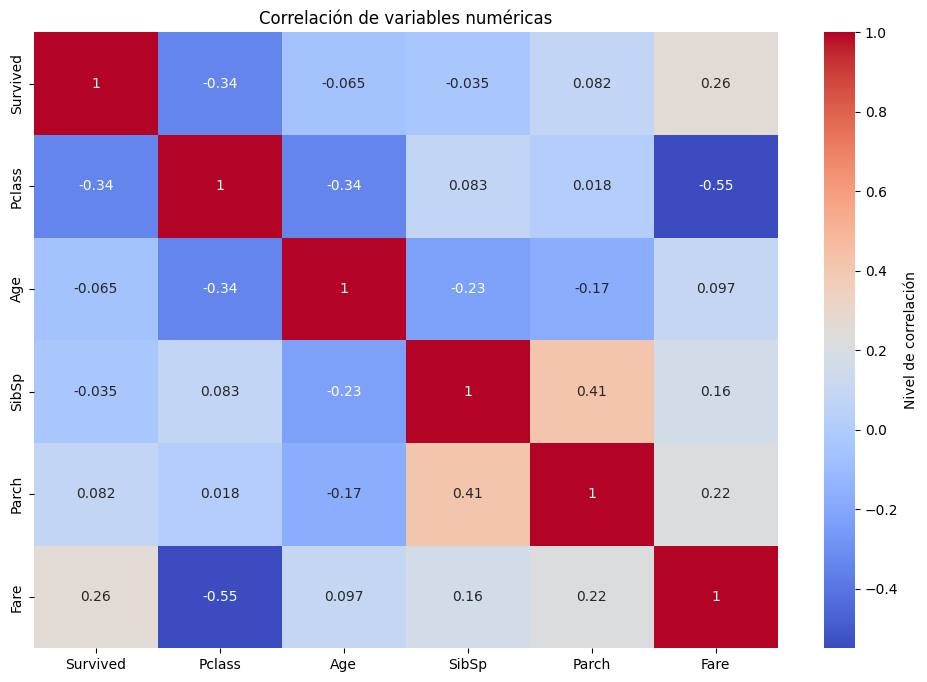

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

**Línea 1:** `plt.figure(figsize = (12, 8))`
- Crea una nueva figura con tamaño de 12x8 pulgadas para que el mapa de calor sea lo suficientemente grande y legible.

**Línea 2:** `sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),`
- Selecciona solo las columnas numéricas especificadas del DataFrame, calcula la matriz de correlación entre ellas usando `.corr()`, y crea un mapa de calor con seaborn.

**Línea 3:** `annot=True,`
- Activa las anotaciones, mostrando los valores numéricos de correlación dentro de cada celda del mapa.

**Línea 4:** `cbar=True,`
- Activa la barra de colores lateral que indica la escala de valores de correlación.

**Línea 5:** `cmap='coolwarm',`
- Define la paleta de colores: azul para correlaciones negativas, rojo para positivas, y blanco cerca de cero.

**Línea 6:** `cbar_kws={'label': 'Nivel de correlación'})`
- Añade una etiqueta personalizada a la barra de colores para explicar qué representa.

**Línea 7:** `plt.title('Correlación de variables numéricas')`
- Establece el título del gráfico.

**Línea 8:** `plt.show()`
- Muestra la gráfica en pantalla.


---
# Ejercicios

Los ejemplos anteriores sirven como mera guía para tu análisis. A continuación presentamos algunas preguntas o instrucciones que deberás contestar en tu notebook:

> **Debes tener una celda por cada una de estas preguntas:**

- 1. Crea una gráfica que muestre la distribución de edades de los pasajeros.

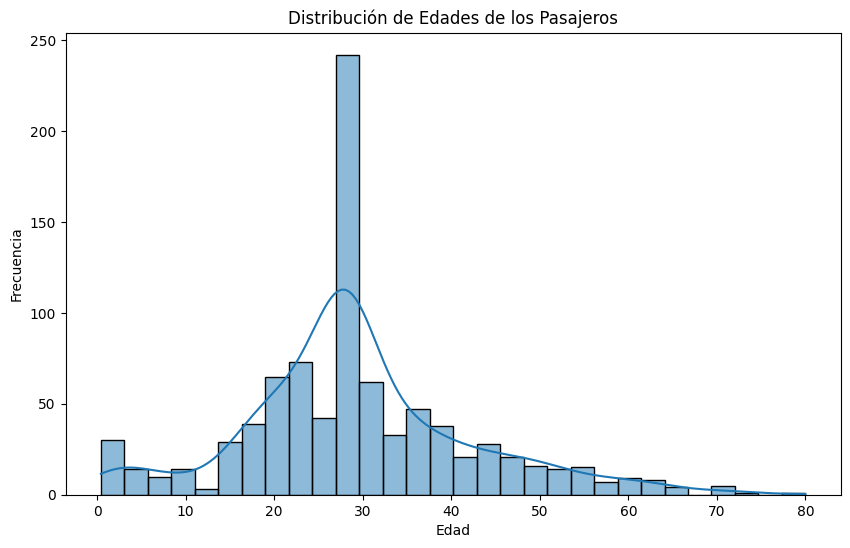

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

- 2. Crea una gráfica que muestre la cantidad de sobrevivientes por clase de pasajero (Pclass).

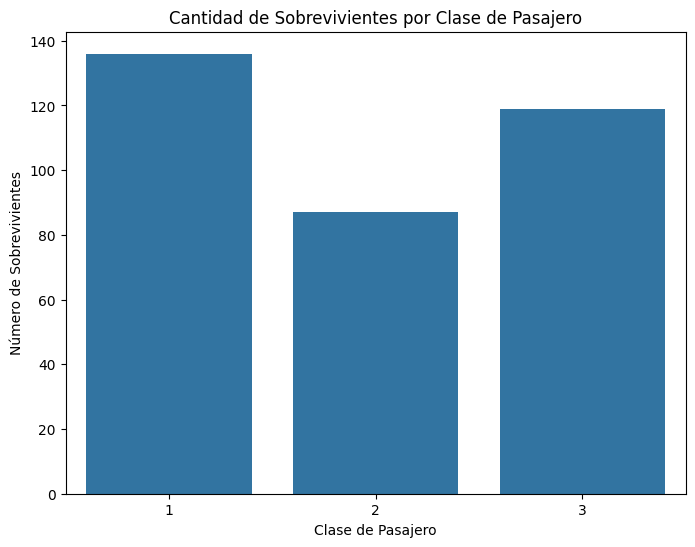

In [13]:
# Filtrar solo los sobrevivientes (Survived = 1)
survivors = df[df['Survived'] == 1]

# Crear gráfica de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=survivors, x='Pclass')
plt.title('Cantidad de Sobrevivientes por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Sobrevivientes')
plt.show()

- 3. Crea una gráfica que muestre la cantidad de sobrevivientes por género (Sex).

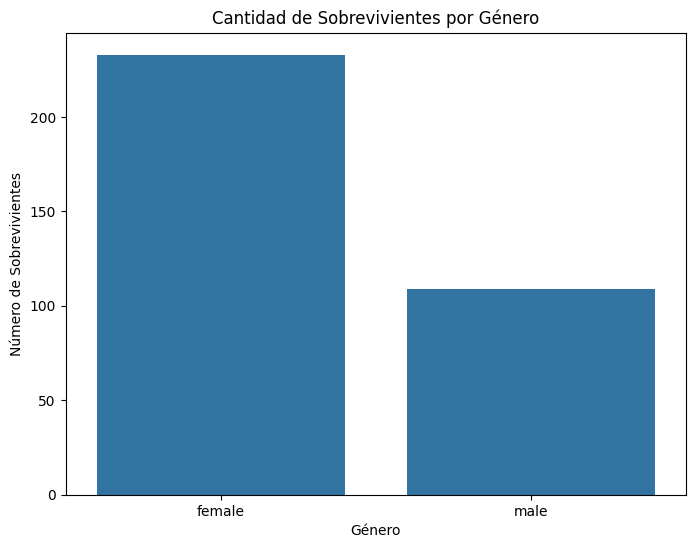

In [14]:
# Filtrar solo los sobrevivientes (Survived = 1)
survivors = df[df['Survived'] == 1]

# Crear gráfica de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=survivors, x='Sex')
plt.title('Cantidad de Sobrevivientes por Género')
plt.xlabel('Género')
plt.ylabel('Número de Sobrevivientes')
plt.show()

- 4. Crea una gráfica que muestre la cantidad de sobrevivientes por puerto de embarque (Embarked).

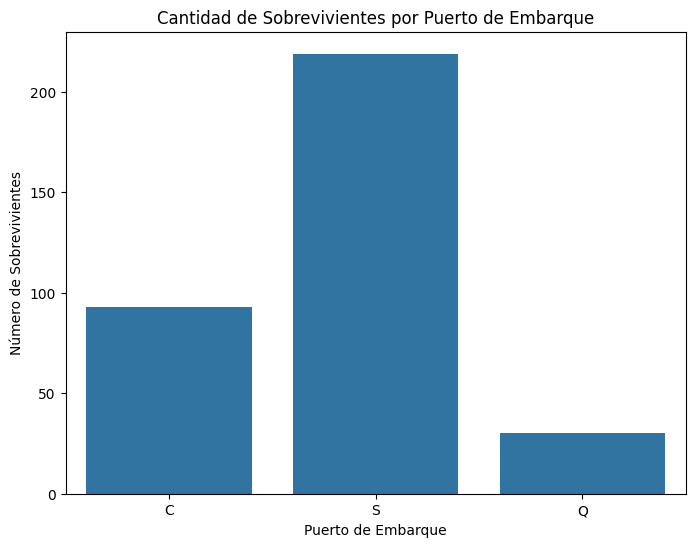

In [15]:
# Filtrar solo los sobrevivientes (Survived = 1)
survivors = df[df['Survived'] == 1]

# Crear gráfica de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=survivors, x='Embarked')
plt.title('Cantidad de Sobrevivientes por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Sobrevivientes')
plt.show()

- 5. Agrupa las edades en categorías (Infante, Niño, Adolescente, Joven Adulto, Adulto, Mayor) y crea una gráfica que muestre la tasa de supervivencia por grupo de edad.

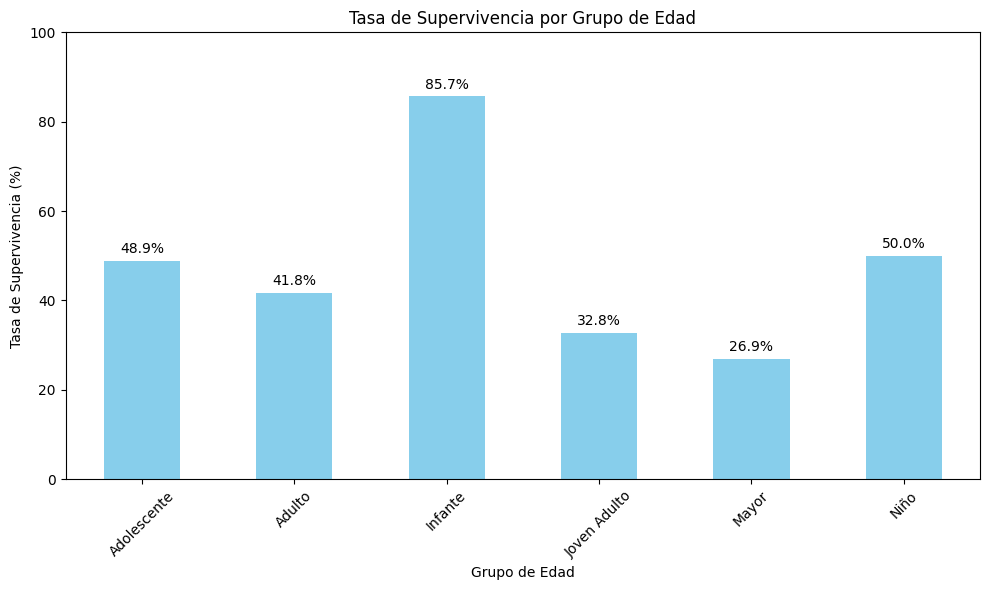

In [16]:
# Crear categorías de edad
def categorize_age(age):
    if age < 2:
        return 'Infante'
    elif age < 12:
        return 'Niño'
    elif age < 18:
        return 'Adolescente'
    elif age < 30:
        return 'Joven Adulto'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Mayor'

# Aplicar la categorización
df['Age_Group'] = df['Age'].apply(categorize_age)

# Calcular tasa de supervivencia por grupo de edad
survival_rate_by_age = df.groupby('Age_Group')['Survived'].mean() * 100

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
ax = survival_rate_by_age.plot(kind='bar', color='skyblue')
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Añadir valores en las barras
for i, v in enumerate(survival_rate_by_age):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

- 6. Crea una gráfica que muestre el conteo de pasajeros en cada clase (Pclass).

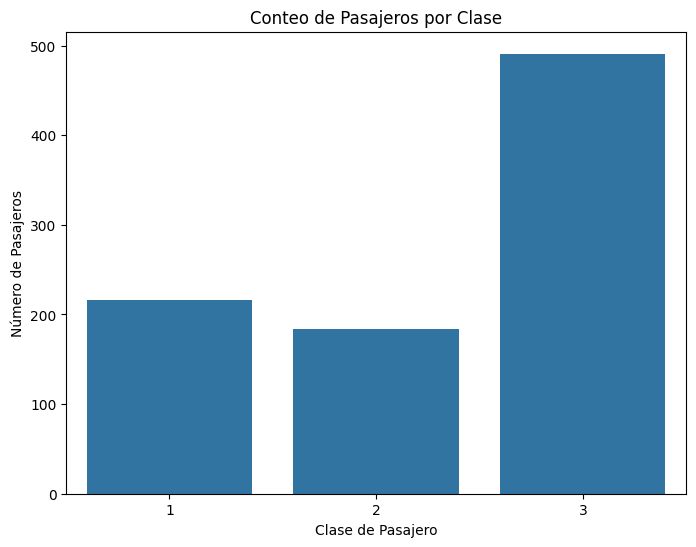

In [17]:
# Crear gráfica de barras del conteo por clase
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass')
plt.title('Conteo de Pasajeros por Clase')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Pasajeros')
plt.show()

- 7. Crea una gráfica que muestre la distribución de género dentro de cada clase de pasajero (Pclass).

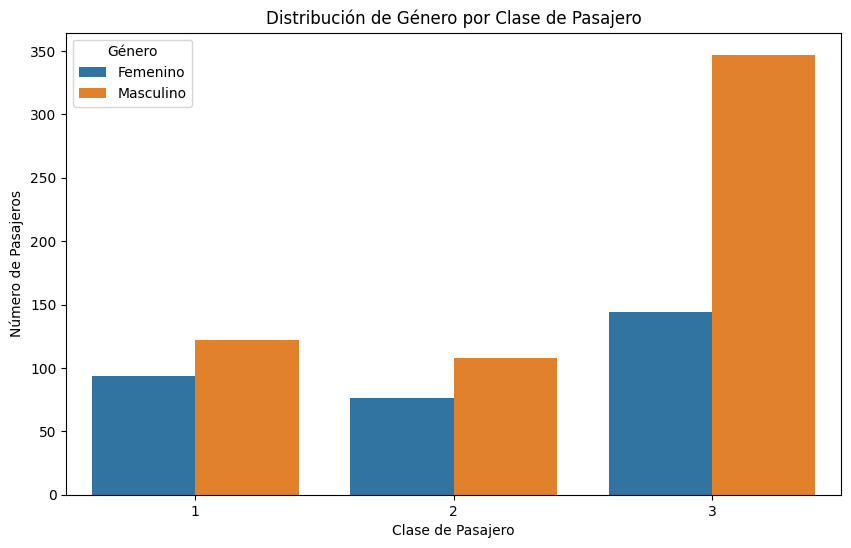

In [18]:
# Crear gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Sex')
plt.title('Distribución de Género por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Género', labels=['Femenino', 'Masculino'])
plt.show()

- 8. Crea una gráfica que muestre la distribución de clase de pasajero por puerto de embarque (Embarked).

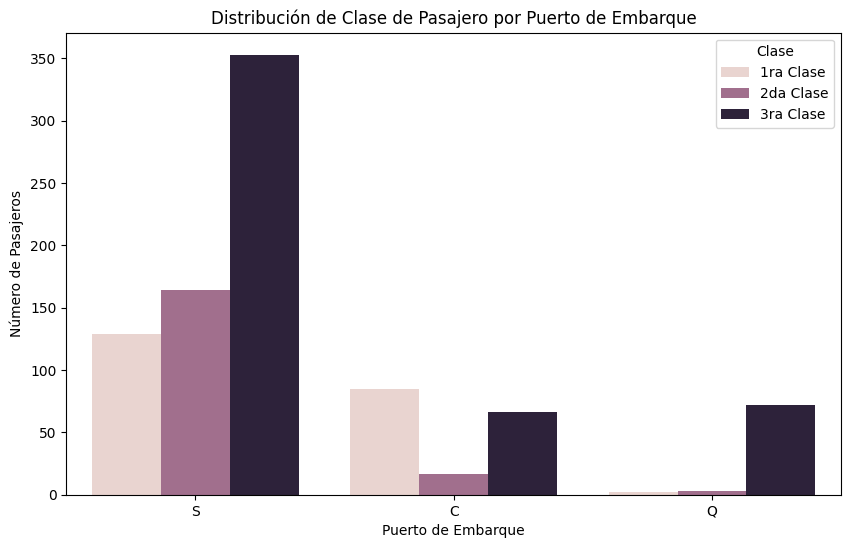

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.title('Distribución de Clase de Pasajero por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Clase', labels=['1ra Clase', '2da Clase', '3ra Clase'])
plt.show()

- 9. Crea una gráfica que muestre el conteo de pasajeros por género (Sex).

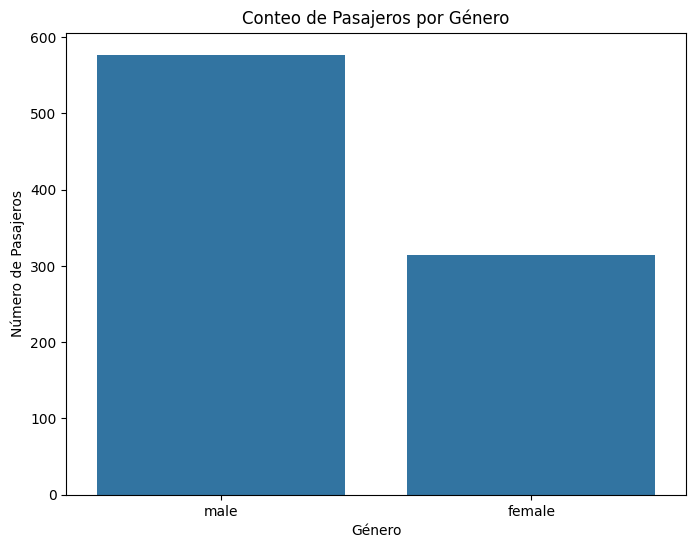

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Conteo de Pasajeros por Género')
plt.xlabel('Género')
plt.ylabel('Número de Pasajeros')
plt.show()

- 10. Encuentra y muestra los valores máximo y mínimo de la columna de edad.

In [21]:
edad_maxima = df['Age'].max()
edad_minima = df['Age'].min()

print(f"Edad máxima: {edad_maxima}")
print(f"Edad mínima: {edad_minima}")

Edad máxima: 80.0
Edad mínima: 0.42


- 11. Crea una gráfica que muestre la distribución de edades, incluyendo líneas verticales que indiquen la media, mediana y moda de las edades.

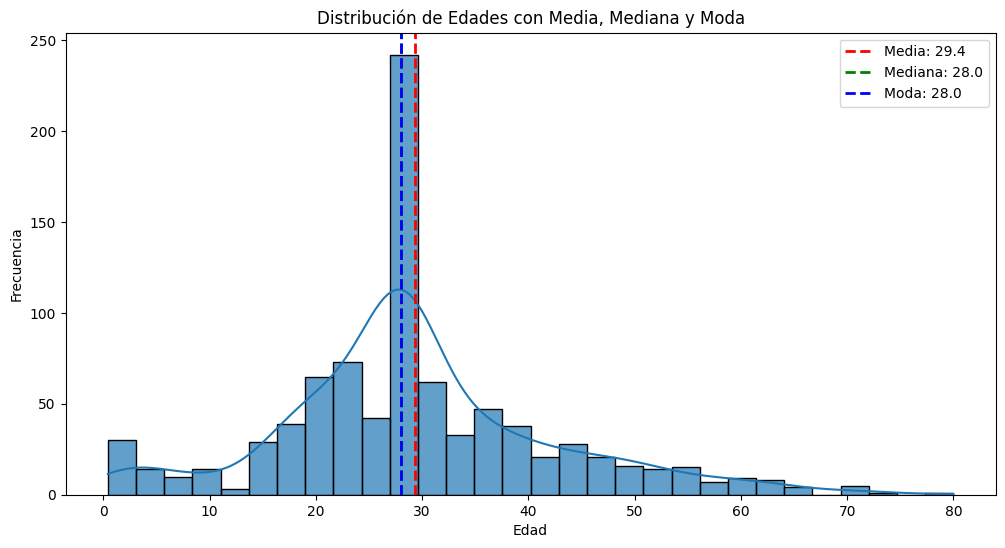

Media: 29.36
Mediana: 28.00
Moda: 28.00


In [22]:
# Calcular estadísticas
media = df['Age'].mean()
mediana = df['Age'].median()
moda = df['Age'].mode()[0]  # mode() devuelve una serie, tomamos el primer valor

# Crear histograma de la distribución de edades
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, alpha=0.7)

# Añadir líneas verticales para las estadísticas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='blue', linestyle='--', linewidth=2, label=f'Moda: {moda:.1f}')

plt.title('Distribución de Edades con Media, Mediana y Moda')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Mostrar los valores exactos
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")

- 12. Crea un diagrama de caja (boxplot) que muestre los outliers en la columna de edad.

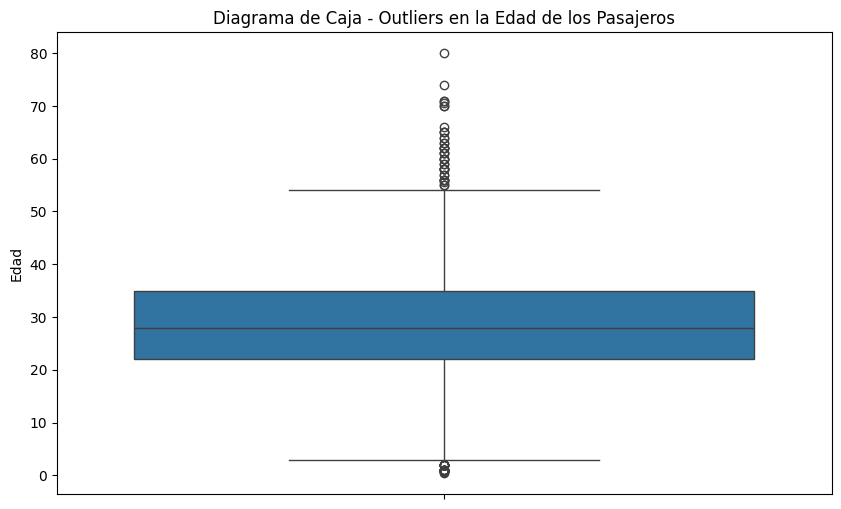

Valores outliers en edad: [np.float64(0.42), np.float64(0.67), np.float64(0.75), np.float64(0.75), np.float64(0.83), np.float64(0.83), np.float64(0.92), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(55.0), np.float64(55.0), np.float64(55.5), np.float64(56.0), np.float64(56.0), np.float64(56.0), np.float64(56.0), np.float64(57.0), np.float64(57.0), np.float64(58.0), np.float64(58.0), np.float64(58.0), np.float64(58.0), np.float64(58.0), np.float64(59.0), np.float64(59.0), np.float64(60.0), np.float64(60.0), np.float64(60.0), np.float64(60.0), np.float64(61.0), np.float64(61.0), np.float64(61.0), np.float64(62.0), np.float64(62.0), np.float64(62.0), np.float64(62.0), np.float64(63.0), np.float64(63.0), np.float64(64.0), np.float64(64.0), 

In [24]:
# Crear diagrama de caja para la columna Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age')
plt.title('Diagrama de Caja - Outliers en la Edad de los Pasajeros')
plt.ylabel('Edad')
plt.show()

# Opcional: Identificar los outliers numéricamente
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]['Age']
print(f"Valores outliers en edad: {sorted(outliers.values)}")
print(f"Número de outliers: {len(outliers)}")

- 13. Encuentra y muestra los valores máximo y mínimo de la columna de tarifa (Fare).

In [25]:
tarifa_maxima = df['Fare'].max()
tarifa_minima = df['Fare'].min()

print(f"Tarifa máxima: ${tarifa_maxima:.2f}")
print(f"Tarifa mínima: ${tarifa_minima:.2f}")

Tarifa máxima: $512.33
Tarifa mínima: $0.00


- 14. Crea una gráfica que muestre la distribución de tarifas, incluyendo líneas verticales que indiquen la media, mediana y moda de las tarifas.

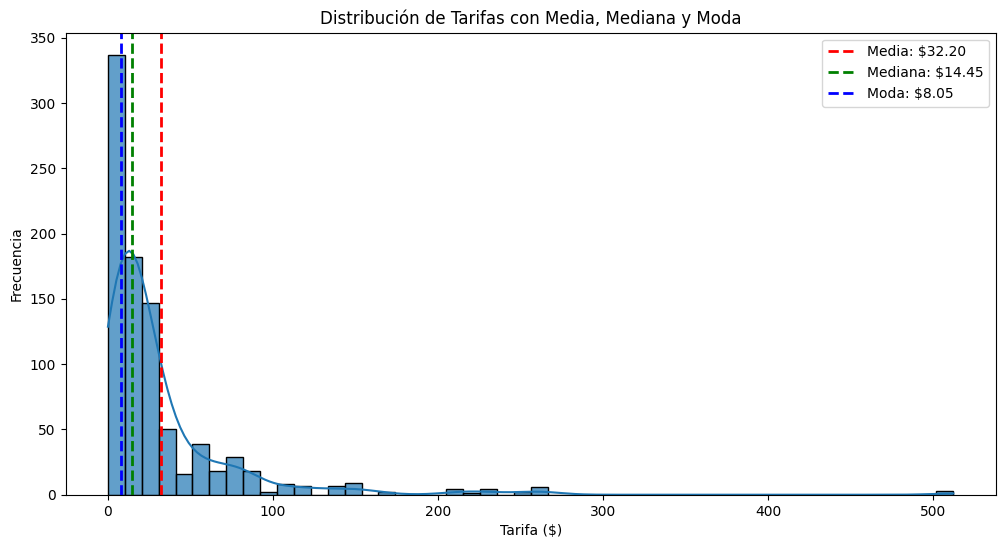

In [26]:
# Calcular estadísticas
media = df['Fare'].mean()
mediana = df['Fare'].median()
moda = df['Fare'].mode()[0]  # mode() devuelve una serie, tomamos el primer valor

# Crear histograma de la distribución de tarifas
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Fare', bins=50, kde=True, alpha=0.7)

# Añadir líneas verticales para las estadísticas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: ${media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.2f}')
plt.axvline(moda, color='blue', linestyle='--', linewidth=2, label=f'Moda: ${moda:.2f}')

plt.title('Distribución de Tarifas con Media, Mediana y Moda')
plt.xlabel('Tarifa ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

- 15. Crea un diagrama de caja (boxplot) que muestre los outliers en la columna de tarifa (Fare).

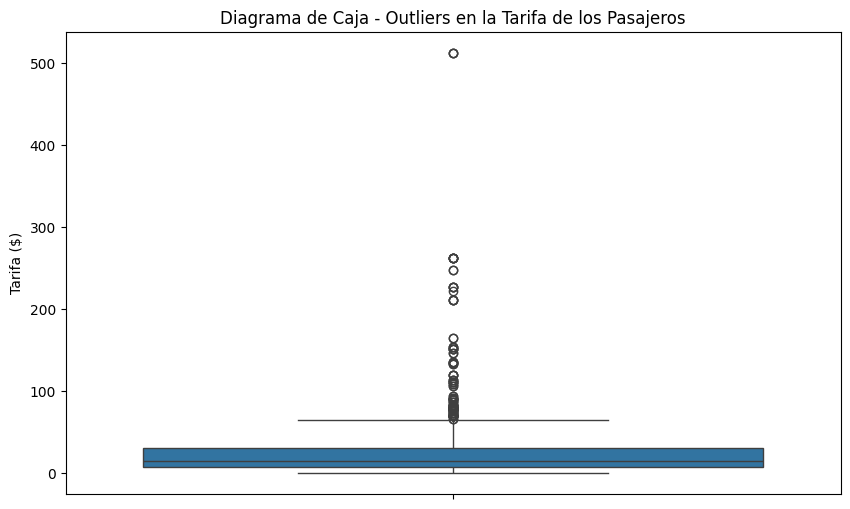

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Fare')
plt.title('Diagrama de Caja - Outliers en la Tarifa de los Pasajeros')
plt.ylabel('Tarifa ($)')
plt.show()

- 16. Filtra y muestra los datos de los pasajeros que pagaron 0 en tarifa.

In [28]:
# Filtrar pasajeros que pagaron tarifa de 0
pasajeros_tarifa_cero = df[df['Fare'] == 0]

# Mostrar los datos
print(f"Número de pasajeros con tarifa $0: {len(pasajeros_tarifa_cero)}")
print("\nDatos de los pasajeros con tarifa $0:")
print(pasajeros_tarifa_cero)

Número de pasajeros con tarifa $0: 15

Datos de los pasajeros con tarifa $0:
     Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked     Age_Group
179         0       3  male  36.0      0      0   0.0        S        Adulto
263         0       1  male  40.0      0      0   0.0        S        Adulto
271         1       3  male  25.0      0      0   0.0        S  Joven Adulto
277         0       2  male  28.0      0      0   0.0        S  Joven Adulto
302         0       3  male  19.0      0      0   0.0        S  Joven Adulto
413         0       2  male  28.0      0      0   0.0        S  Joven Adulto
466         0       2  male  28.0      0      0   0.0        S  Joven Adulto
481         0       2  male  28.0      0      0   0.0        S  Joven Adulto
597         0       3  male  49.0      0      0   0.0        S        Adulto
633         0       1  male  28.0      0      0   0.0        S  Joven Adulto
674         0       2  male  28.0      0      0   0.0        S  Joven Adulto

- 17. Crea una gráfica que muestre el conteo de pasajeros por número de hermanos/esposos a bordo (SibSp).

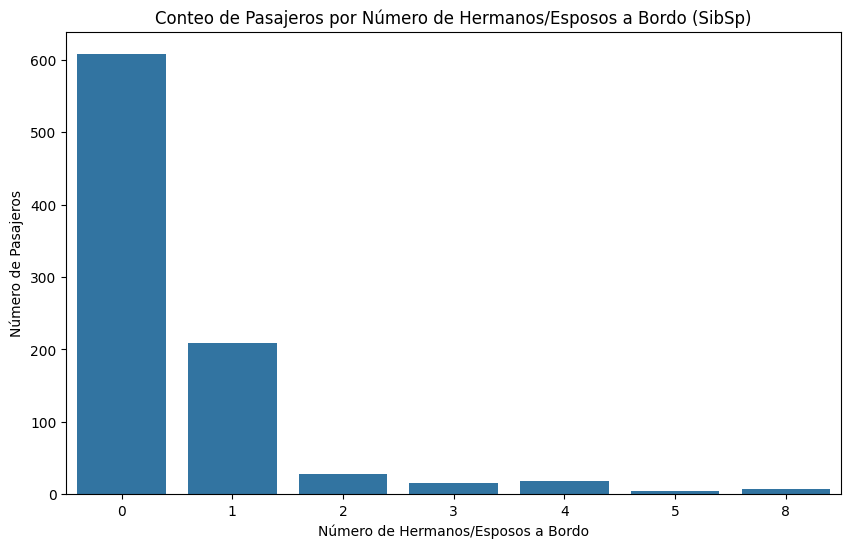

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp')
plt.title('Conteo de Pasajeros por Número de Hermanos/Esposos a Bordo (SibSp)')
plt.xlabel('Número de Hermanos/Esposos a Bordo')
plt.ylabel('Número de Pasajeros')
plt.show()

- 18. Crea una gráfica que muestre la tasa de supervivencia basada en el número de hermanos/esposos a bordo (SibSp).

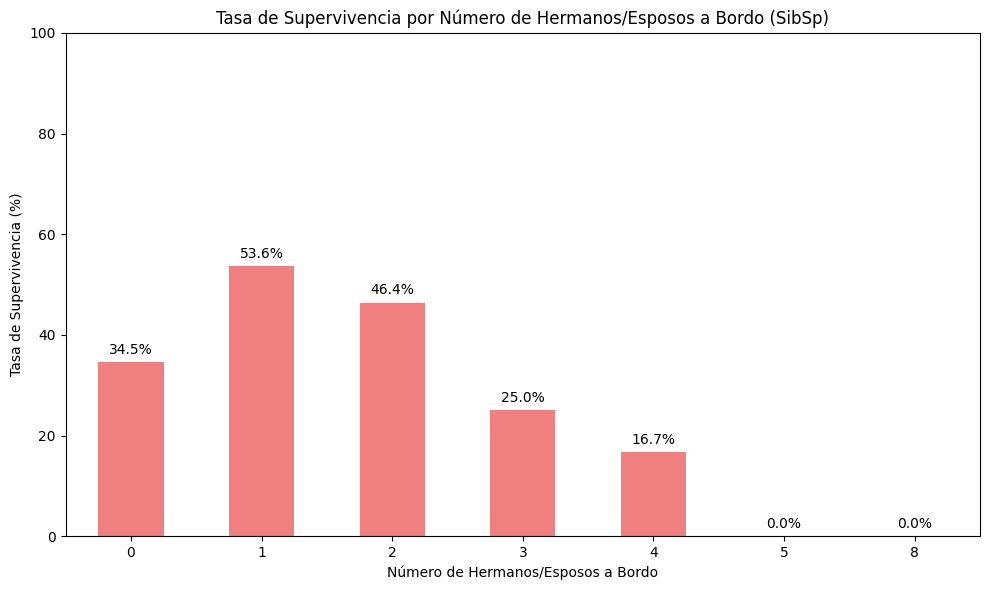

In [30]:
# Calcular tasa de supervivencia por SibSp
survival_rate_by_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
ax = survival_rate_by_sibsp.plot(kind='bar', color='lightcoral')
plt.title('Tasa de Supervivencia por Número de Hermanos/Esposos a Bordo (SibSp)')
plt.xlabel('Número de Hermanos/Esposos a Bordo')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Añadir valores en las barras
for i, v in enumerate(survival_rate_by_sibsp):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

- 19. Calcula y muestra el porcentaje de supervivencia para cada valor de SibSp.

In [31]:
# Calcular el porcentaje de supervivencia para cada valor de SibSp
survival_percentage_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

# Mostrar los resultados
print("Porcentaje de Supervivencia por Número de Hermanos/Esposos a Bordo (SibSp):")
print("=" * 70)
for sibsp, percentage in survival_percentage_sibsp.items():
    total_passengers = len(df[df['SibSp'] == sibsp])
    survivors = df[(df['SibSp'] == sibsp) & (df['Survived'] == 1)].shape[0]
    print(f"SibSp {sibsp}: {percentage:.2f}% ({survivors}/{total_passengers} pasajeros)")

print(f"\nResumen:")
print(survival_percentage_sibsp.round(2))

Porcentaje de Supervivencia por Número de Hermanos/Esposos a Bordo (SibSp):
SibSp 0: 34.54% (210/608 pasajeros)
SibSp 1: 53.59% (112/209 pasajeros)
SibSp 2: 46.43% (13/28 pasajeros)
SibSp 3: 25.00% (4/16 pasajeros)
SibSp 4: 16.67% (3/18 pasajeros)
SibSp 5: 0.00% (0/5 pasajeros)
SibSp 8: 0.00% (0/7 pasajeros)

Resumen:
SibSp
0    34.54
1    53.59
2    46.43
3    25.00
4    16.67
5     0.00
8     0.00
Name: Survived, dtype: float64


- 20. Crea un mapa de calor (heatmap) que muestre la matriz de correlación de las características numéricas en el dataset.

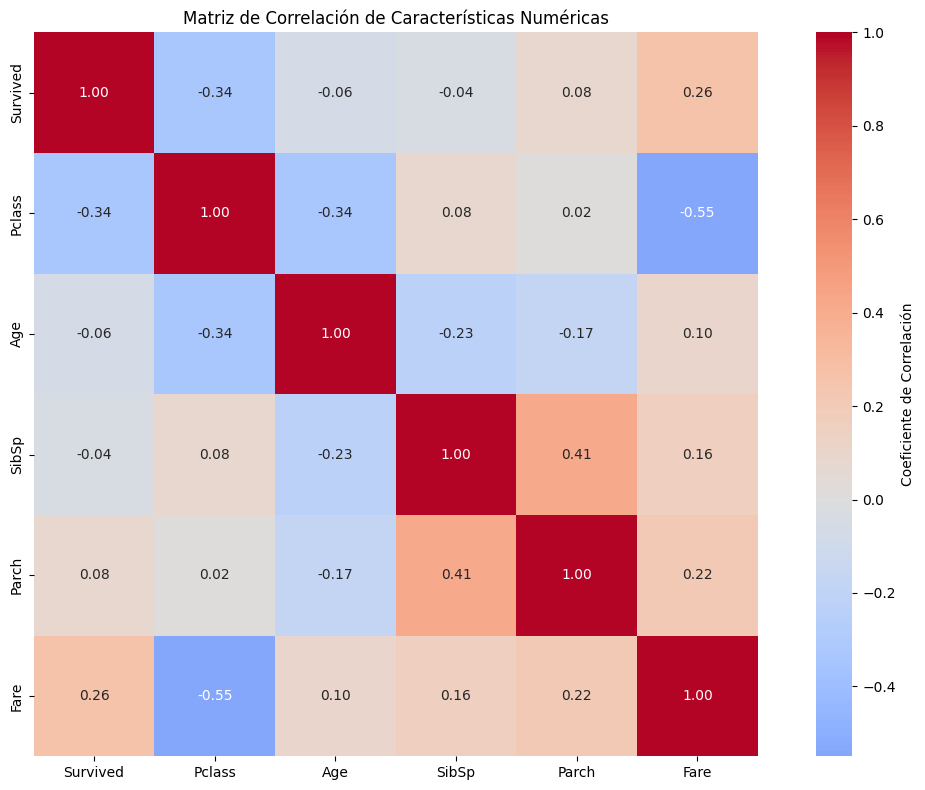

Columnas numéricas incluidas: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [32]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores numéricos
            cmap='coolwarm',      # Paleta de colores
            center=0,             # Centrar en 0
            square=True,          # Hacer cuadrados las celdas
            fmt='.2f',            # Formato de 2 decimales
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('Matriz de Correlación de Características Numéricas')
plt.tight_layout()
plt.show()

# Mostrar las columnas incluidas
print(f"Columnas numéricas incluidas: {list(numeric_columns)}")


---